It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

<br>Do any of your classifiers seem to overfit?
<br>Which seem to perform the best? Why?
<br>Which features seemed to be most impactful to performance?
<br><br>Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amazon_cells_labelled.csv', delimiter= '\t', header=None)
df.columns = ['feedback', 'positive']

In [3]:
df

,feedback,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [4]:
df.dtypes

feedback    object
positive     int64
dtype: object

In [5]:
df['positive']=(df['positive']==1)

In [6]:
keywords=['good','great','excellent','impressed']

In [7]:
for key in keywords:
    df[str(key)]=df.feedback.str.contains(' '+str(key)+' ',case=False)

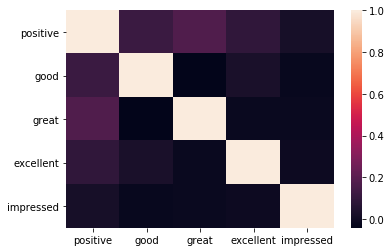

In [8]:
sns.heatmap(df.corr())

In [9]:
data=df[keywords]
target=df['positive']

In [10]:
from sklearn.naive_bayes import BernoulliNB

In [11]:
bnb=BernoulliNB()

In [12]:
bnb.fit(data,target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [13]:
y_pred=bnb.predict(data)

In [14]:
print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0],
        target!=y_pred.sum()))

Number of mislabeled points out of a total 1000 points : 0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
970    True
971    True
972    True
973    True
974    True
975    True
976    True
977    True
978    True
979    True
980    True
981    True
982    True
983    True
984    True
985    True
986    True
987    True
988    True
989    True
990    True
991    True
992    True
993    True
994    True
995    True
996    True
997    True
998    True
999    True
Name: positive, Length: 1000, dtype: bool


### Success Rate

In [15]:
accuracy=round(y_pred.sum()/data.shape[0]*100,2)
print("Accuracy Rate: {}%".format(accuracy))

Accuracy Rate: 9.8%


### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(target,y_pred)
print(c)

[[484  16]
 [418  82]]


### Sensitivity

In [17]:
sensitivity=round(c[1,1]/(c[1,0]+c[1,1])*100,2)
print("sensitivity = {}%".format(sensitivity))

sensitivity = 16.4%


### Specificity

In [18]:
specificity=round(c[0,0]/(c[0,0]+c[0,1])*100,2)
print("sensitivity = {}%".format(specificity))

sensitivity = 96.8%


### Hold Out Group

In [19]:
from sklearn.model_selection import train_test_split
per=20
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=per/100,random_state=20)
accuacy_20=round(bnb.fit(x_train,y_train).score(x_test,y_test)*100,2)
accuracy_sample=round(bnb.fit(data,target).score(data,target)*100,2)
print('Accuracy within {}% Holdout: {}%'.format(per,accuacy_20))
print('Accuracy within Testing on Sample: {}%'.format(accuracy_sample))

Accuracy within 20% Holdout: 56.0%
Accuracy within Testing on Sample: 56.6%


### Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb,data,target,cv=10)

array([0.57, 0.58, 0.57, 0.56, 0.55, 0.59, 0.57, 0.54, 0.58, 0.53])